<a href="https://colab.research.google.com/github/cflc/NanoDevices/blob/main/62540_F22_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""Author: Peter Satterthwaite July, 2021
Modified for Google Colab by Emma Batson"""
import math
import numpy as np              
import matplotlib.pyplot as plt 
from matplotlib import image    #   Library for importing images
from google.colab import files

In [7]:
uploaded = files.upload()

Saving IMG_7107.jpg to IMG_7107.jpg


In [3]:
""" Helper functions for this module """

def process_image(this_image,y_range):
    """ Take an RGB image and output 1D data by integating across colors
    and the y-axis of the image. It assumes that the diffracted orders are to
    the right of the image of the slit. 
    
    Arguments:
        this_image - The RGB image to be processed
        y_range - the range in y to integrate over (determined by height of slit)
    Outputs:
        x - 1D array, starting at 0, with the same length as y
        y - 1D array holding integrated spectrometer data. y[0] is the point 
        which has the highest intensity, which should be the center of the image of the slit
    """
    tmp = np.sum(this_image,2)   # Sum over colors
    y = np.sum(tmp[y_range,:],0) # Sum along y-axis
    x0 = np.argmax(y) # Find center of slit
    y = y[x0:] # Crop data left of slit
    x = np.arange(0,np.size(y)) # Generate x
    return x,y



def calibrate_lambda(x,LAMBDA,ref_x,ref_lambda,theta_i=36.4, order=1):
    """ Calibrate the spectrometer based on an image where a peak of a known 
    wavelength is observed 
    
    Arguments:
        x - 1D array, the raw x positions from the spectrometer
        LAMBDA - The periodicity of the diffraction grating
        ref_x - The x-position of the peak of known wavelength
        ref_lambda - the wavelength, in nm, of the known peak
        theta_i - The angle of the grating relative to the slit in degrees.
        The default is 36.4 degrees
        order - order of diffraction. Default = 1
    Outputs:
        lambda_x - the mapping of x to wavelength in nm, where lambda_x[i] is 
        the wavelength corresponding to position x[i]
    """
    LAMBDA = 2*LAMBDA/order # emperical calibration factor

    theta_i = theta_i*math.pi/180 # Convert to radians 
    theta_d = np.arcsin(np.sin(theta_i)+ref_lambda/LAMBDA) # Angle that ref_lambda diffracts at
    theta_obs = theta_d-theta_i 
    print(theta_obs)
    # Scale factor which accounts for the length of the spectrometer and  magnification of camera
    scale_fact = ref_x/(np.tan(theta_obs));
    
    theta = np.arctan(x/scale_fact); # Observed angle corresponding to each x position 
    theta_d = theta+theta_i; # Diffracted angle corresponding to each x position 
    lambda_x = (np.sin(theta_d)-np.sin(theta_i))*LAMBDA; # wavelength corresponding to each x position 
    return lambda_x

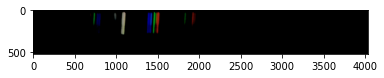

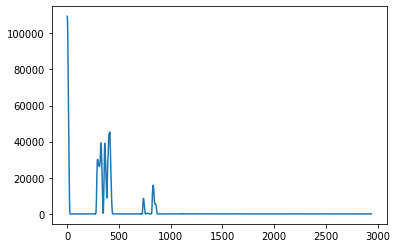

In [166]:
"""Import calibration data"""

# TODO: Modify code to work with your calibration sample


# Close any open figures
plt.close('all')

# Import and show image
this_image = image.imread('IMG_7102 2.jpg') 
# TODO: your design value here
LAMBDA = 6000    # Grating pitch in nm 


# Convert image to 1D data
this_image = np.transpose(this_image,(1,0,2))
this_image = np.flip(this_image,1) # Make sure diffraction peaks are right of slit 
plt.figure()
plt.imshow(this_image)
x,y = process_image(this_image,range(0,490)) # Range is based on height of slit
# Plot image
plt.figure()
plt.plot(x,y)
#plt.xlim({200, 500})   # TODO (Colab only) iteratively change the coordinates to isolate the ref_lambda peak, then guesstimate the ref_x


0.05784639288806659


Text(0, 0.5, 'Intensity (arbitrary units)')

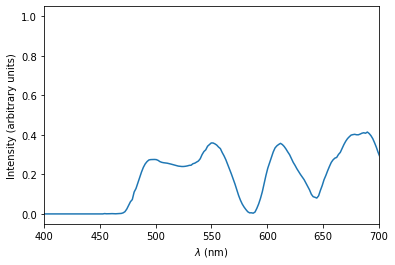

In [167]:

"""Calibrate wavelength"""
# Calibrate the wavelength scale using a peak with a known position
theta_i = 36.4   # Grating angle in degrees

# TODO: set these values to match yours
ref_lambda = 546.5 # Check CLF spectrum
ref_x = 325   # Determined by zooming in on plot
order = 1        # Diffraction order

lambda_x = calibrate_lambda(x,LAMBDA,ref_x,ref_lambda,theta_i,order)


plt.figure()
plt.plot(lambda_x,y/max(y))
plt.xlim({400, 700})
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Intensity (arbitrary units)')


(700.0, 500.0)

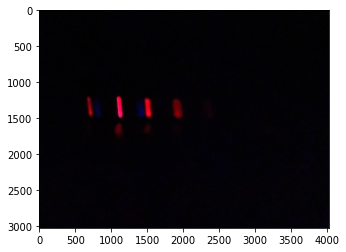

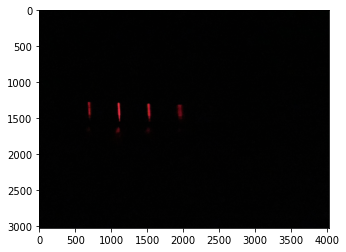

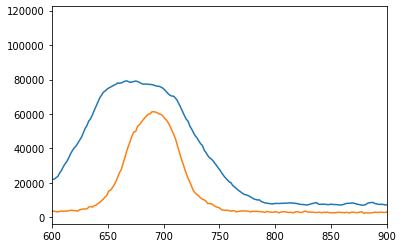

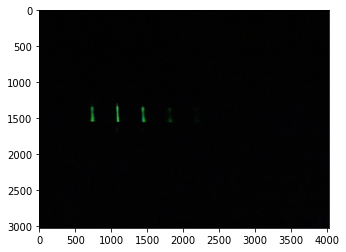

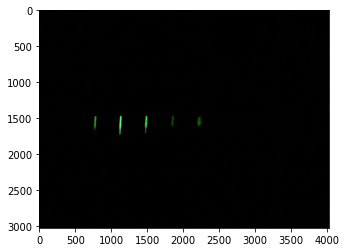

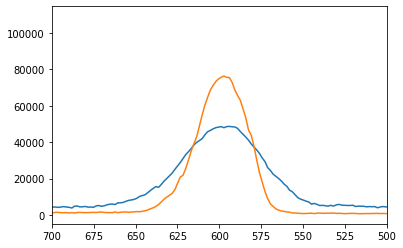

In [176]:

"""Measure quantum dots"""

# TODO: Import and plot calibrated data for quantum dots
"""Import calibration data"""

# TODO: Modify code to work with your calibration sample


# Close any open figures
plt.close('all')
# TODO: your design value here
LAMBDA = 6000    # Grating pitch in nm 

# Import and show image
red_1 = image.imread('IMG_7119.jpg') 
red_2 = image.imread("IMG_7120.JPG")


# Convert image to 1D data
#this_image = np.transpose(this_image,(1,0,2))
red_1 = np.flip(red_1,1) # Make sure diffraction peaks are right of slit 
red_2 = np.flip(red_2,1) # Make sure diffraction peaks are right of slit 

plt.figure()
plt.imshow(red_1)
plt.figure()
plt.imshow(red_2)

plt.figure()
x,y = process_image(red_1,range(1000,1700)) # Range is based on height of slit
#plt.plot(lambda_x,y[0:len(lambda_x)])
plt.plot(lambda_x[0:len(y)],y)
x,y = process_image(red_2,range(1200,1700)) # Range is based on height of slit
#plt.plot(lambda_x,y[0:len(lambda_x)])
plt.plot(lambda_x[0:len(y)],y)
plt.xlim({600, 900})   # TODO (Colab only) iteratively change the coordinates to isolate the ref_lambda peak, then guesstimate the ref_x



# Import and show image
green_1 = image.imread('IMG_7121.JPG') 
green_2 = image.imread("IMG_7123 2.jpg")


# Convert image to 1D data
#green_1 = np.transpose(green_1,(1,0,2))
green_2 = np.transpose(green_2,(1,0,2))
green_1 = np.flip(green_1,1) # Make sure diffraction peaks are right of slit 
green_2 = np.flip(green_2,1) # Make sure diffraction peaks are right of slit 

plt.figure()
plt.imshow(green_1)
plt.figure()
plt.imshow(green_2)

plt.figure()
x,y = process_image(green_1,range(1200,1700)) # Range is based on height of slit
#plt.plot(lambda_x,y[0:len(lambda_x)])
plt.plot(lambda_x[0:len(y)],y)
x,y = process_image(green_2,range(1200,1700)) # Range is based on height of slit
#plt.plot(lambda_x,y[0:len(lambda_x)])
plt.plot(lambda_x[0:len(y)],y)
plt.xlim({500, 700})   # TODO (Colab only) iteratively change the coordinates to isolate the ref_lambda peak, then guesstimate the ref_x





